<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Unsupervised_binning_using_quantile_%26_uniform_%26_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml -working/train.csv",usecols=['Age','Fare','Survived'])

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.shape

(714, 3)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [ ]:
c=(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
float(c)

0.6330985915492958

In [ ]:
kbin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')
kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')

In [ ]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [ ]:
trf.named_transformers_['first'].n_bins_

array([5])

In [ ]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)


In [ ]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [ ]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [ ]:
trf.named_transformers_['first'].n_bins_

array([15])

In [ ]:
trf.named_transformers_['second']

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [ ]:
trf.named_transformers_['second'].n_bins_

array([15])

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [ ]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [ ]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [ ]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [ ]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
130,33.0,9.0,7.8958,3.0,"(32.0, 35.0]","(7.775, 7.896]"
811,39.0,11.0,24.1500,8.0,"(38.0, 42.0]","(18.75, 26.0]"
37,21.0,4.0,8.0500,3.0,"(19.0, 21.0]","(7.896, 8.158]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
365,30.0,8.0,7.2500,1.0,"(28.0, 30.0]","(0.0, 7.25]"


In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)


In [ ]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [ ]:
x_trf=trf.fit_transform(x)
c=(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
float(c)

0.6289123630672926

In [ ]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
  ])
  x_trf=trf.fit_transform(x)
  c=(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
  print(f"{strategy} {bins} {c}")

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Age'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(x_trf[:,0],color='red')
  plt.title('After')
  plt.show()


  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Fare'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(x_trf[:,0],color='red')
  plt.title('After')
  plt.show()





quantile 10 0.6288928012519561


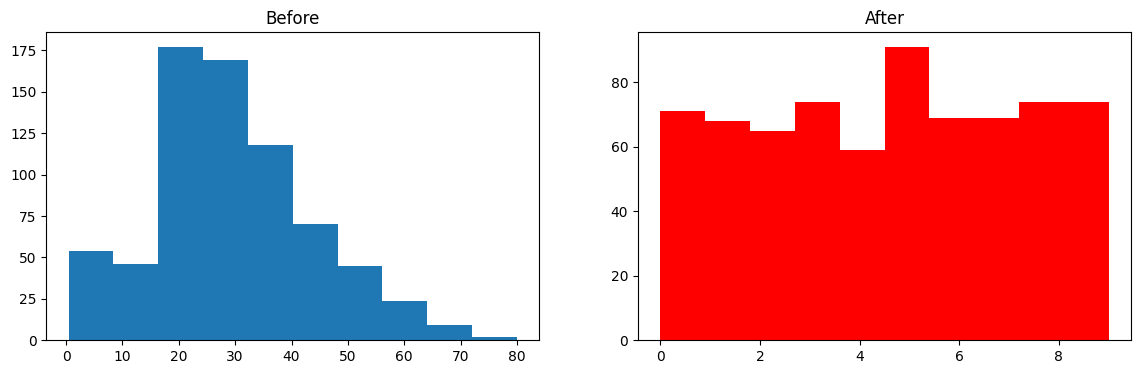

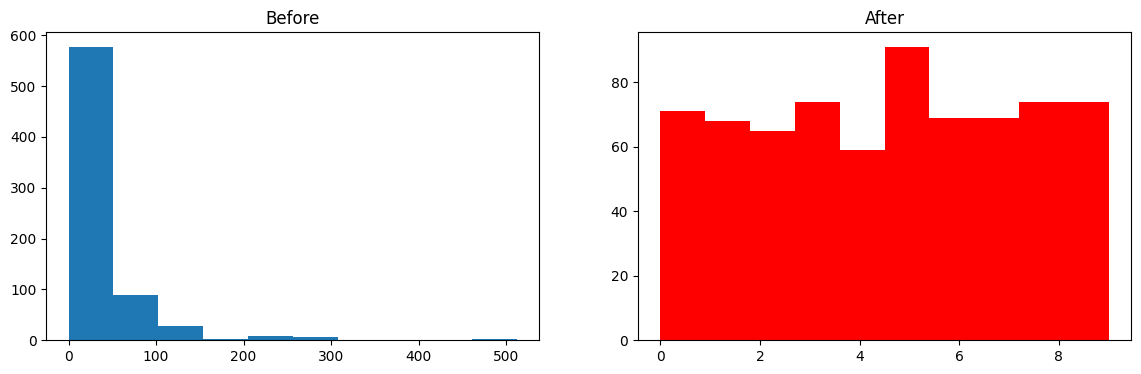

In [ ]:
discretize(10,'quantile')

uniform 10 0.6288928012519561


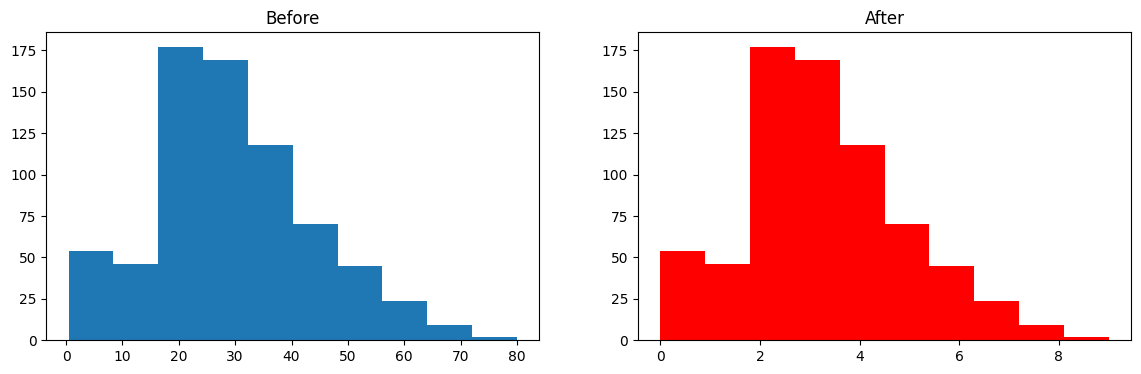

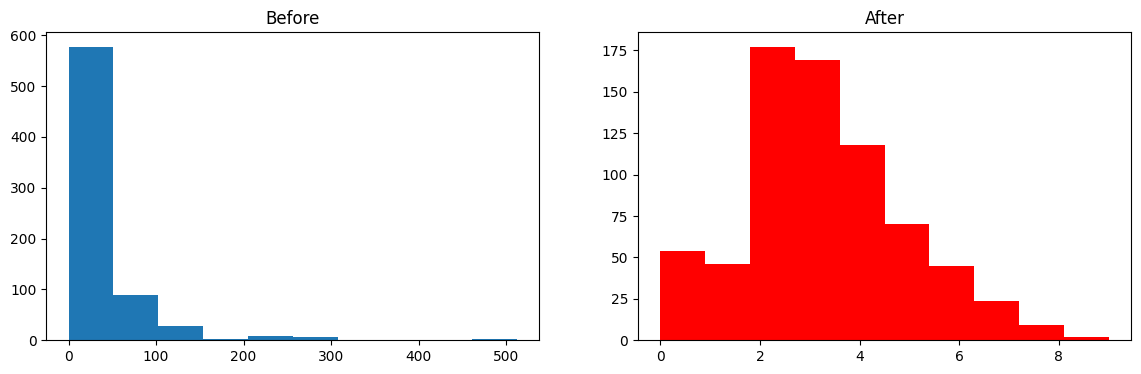

In [ ]:
discretize(10,'uniform')

kmeans 10 0.6330790297339594


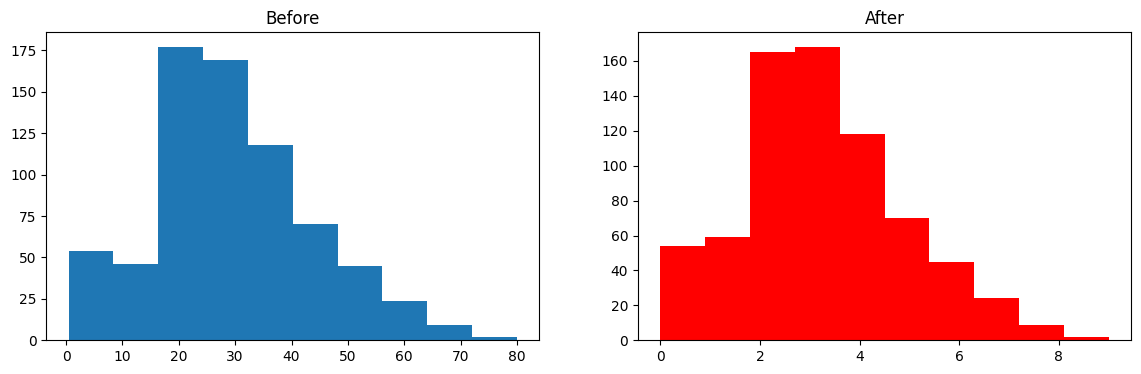

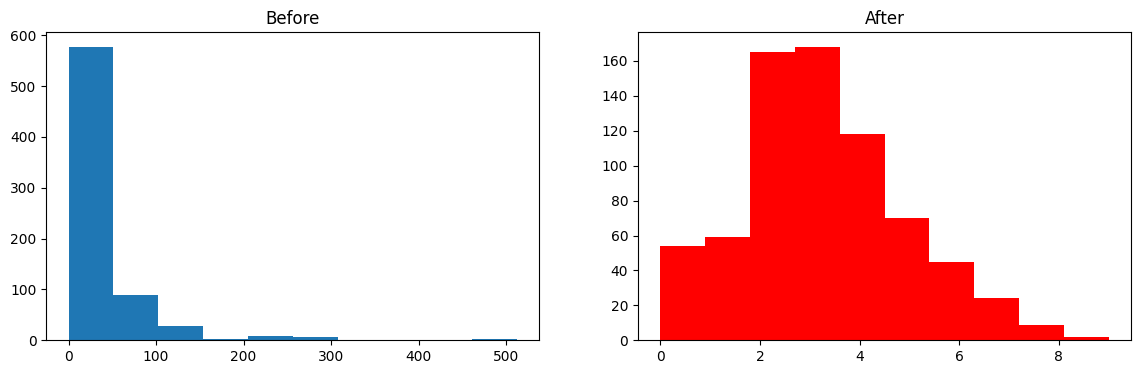

In [ ]:
discretize(10,'kmeans')